In [1]:
#路径管理/全局变量
import os
import sys

# 设置为项目根目录（包含 data, pipline 等文件夹的目录）
project_root = os.path.abspath("..")
os.chdir(project_root)
sys.path.append(project_root)
from utils.config import KEYWORDS
from utils.path_helper import get_data_path

#基础模块
import numpy as np
import pandas as pd

#清洗函数，特征工程函数导入
from pipline.pipline import pipeline_house_data
from features_wlh.features_wlh import add_selected_features
#导入训练函数
from model.train_model import train_model
#选择训练函数，自己去调整
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
#训练集划分(已经在train_model里面做过,导入只是告诉你已经做完了)
from sklearn.model_selection import train_test_split
#特征选择
from features_wlh.feature_selector import feature_selection_by_k,select_final_top_features
#from features_wlh.feature_selector import make_advanced_features
#特征值相关性检验
from features_wlh.feature_analysis import plot_feature_correlation
#共线性检验
from features_wlh.feature_vif_validation import check_multicollinearity
#特征值重要性与目标性选择
from features_wlh.FeatureDeepAnalysis import FeatureDeepAnalysis
#评估
from model.evaluate import evaluate_model
from advanced_modify.cross_validation import enhanced_cross_validate

Series of Preparation Before Training

d:\soft\Python\Python310\python.exe
Amount_clean分布


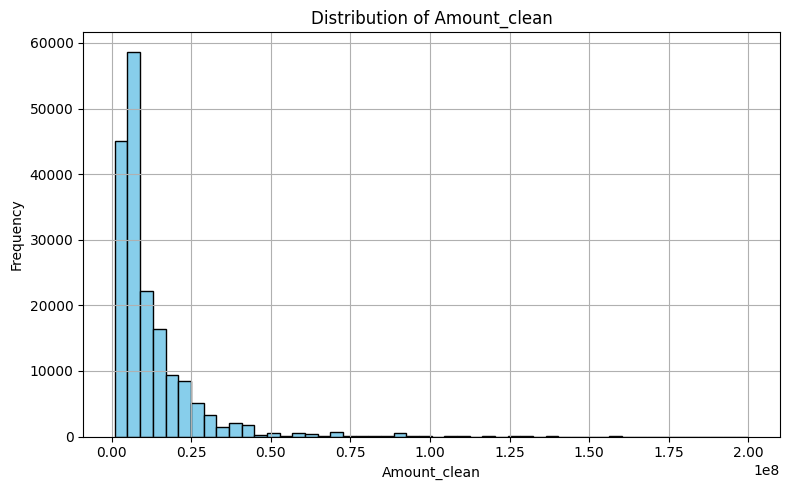

对数化后的Amount_clean分布


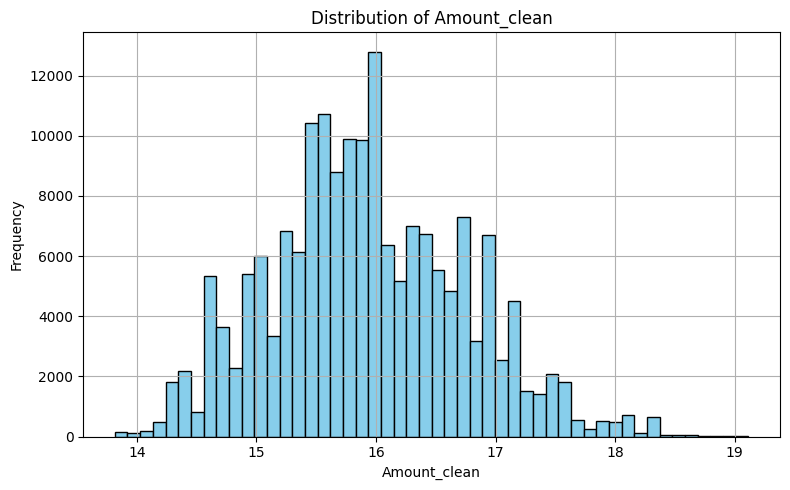

清洗后的数据表结构: (177572, 33)


In [2]:
##检查操作路径
import sys
print(sys.executable)
# 直接读取数据
#df_cleaned = pd.read_csv(get_data_path("processed_data/house_prices_cleaned.csv"))
# 清洗数据
df = pd.read_csv(get_data_path("house_prices.csv"))
df_cleaned = pipeline_house_data(df, keywords=KEYWORDS)
print("清洗后的数据表结构:", df_cleaned.shape)

In [3]:
#强制重载一下
import importlib
import features_wlh.features_wlh
importlib.reload(features_wlh.features_wlh)  # 强制重新载入模块
from features_wlh.features_wlh import add_selected_features, list_registered_features

In [ ]:
q99 = df_cleaned['Amount_clean'].quantile(0.99)
q1 = df_cleaned['Amount_clean'].quantile(0.01)
print(df_cleaned['Amount_clean'].describe())
print(q99)
print(q1)

17.989897843244528
14.285514812209815


Fundenmental Analysis

Analysis with picture and Visualization

Project  of Features and Validation

In [7]:
My_features = [
    "Car_Parking",
    "Bathroom",
    "Furnishing_giving",
    "Transaction_giving",
    "balcony_rank",
    "is_ground",
    "quality_score",
    "location_rank",
    "max_floor",
    "ownership_score",
    "relative_height",
    "society_level_hot", 
    "std_Carpet_Area",
    "facing_giving",
    "Status_giving",
    "is_multi_bathroom",
    "is_popular_location",
    "floor_area_combo",
    "location_comfort_combo",
    "floor_facing_score",
    "location_ownership_combo",
    "facing_height_combo",
    "area_furnishing_combo"
    ] #一个示例，训练的时候根据特征分析自己去选


#添加并检查
df_cleaned_features = add_selected_features(df_cleaned, features_to_use = My_features)
print("当前 df_cleaned_features 的列有：", df_cleaned_features.columns.tolist())
missing = [feat for feat in My_features if feat not in df_cleaned_features.columns]
print("缺失的特征：", missing)
df_cleaned_features.isnull().sum()
print("✅ 当前注册的特征值函数有：", list(list_registered_features()))
print("当前特征值是否为空",df_cleaned_features[My_features].isnull().sum())
print("当前特征值数值类型",df_cleaned_features[My_features].dtypes)


当前 df_cleaned_features 的列有： ['Index', 'Price (in rupees)', 'Carpet Area', 'Status', 'Transaction', 'Furnishing', 'Balcony', 'is_prime_location', 'has_proximity', 'is_well_planned', 'is_new', 'is_resale', 'is_affordable', 'is_deal', 'is_spacious', 'is_luxury', 'is_gated', 'has_amenities', 'has_green_space', 'is_marketing_strong', 'location_encoded', 'floor_level', 'max_floor', 'is_ground', 'is_basement', 'relative_height', 'col_facing_score', 'col_overlooking_score', 'society_level', 'col_Bathroom_score', 'col_car_parking_score', 'ownership_score', 'Amount_clean', 'Car_Parking', 'Bathroom', 'Furnishing_giving', 'Transaction_giving', 'balcony_rank', 'quality_score', 'location_rank', 'location_level', 'society_level_hot', 'std_Carpet_Area', 'facing_giving', 'Status_giving', 'is_multi_bathroom', 'is_popular_location', 'floor_area_combo', 'location_comfort_combo', 'floor_facing_score', 'location_ownership_combo', 'facing_height_combo', 'area_furnishing_combo']
缺失的特征： []
✅ 当前注册的特征值函数有： ['pri

Easy Chioce of your features

In [ ]:
print("打印df_cleaned表头")
print(df_cleaned_features.columns.tolist())
#筛选特征值
print("step1---筛选特征值")
# 分析每个特征数下的最优组合
df_result = feature_selection_by_k(df_cleaned[My_features], target_col = df_cleaned["Amount_clean"], max_k=20, rank_features=10, model_cls = RandomForestRegressor)
print(df_result)
# 直接选出最终最重要的15个特征
top_features = select_final_top_features(df_cleaned[My_features], target_col = df_cleaned["Amount_clean"], max_k=20, top_k=15, model_cls = RandomForestRegressor)
for feature in top_features:
    print(feature)

打印df_cleaned表头
['Index', 'Price (in rupees)', 'Carpet Area', 'Status', 'Transaction', 'Furnishing', 'Balcony', 'is_prime_location', 'has_proximity', 'is_well_planned', 'is_new', 'is_resale', 'is_affordable', 'is_deal', 'is_spacious', 'is_luxury', 'is_gated', 'has_amenities', 'has_green_space', 'is_marketing_strong', 'location_encoded', 'floor_level', 'max_floor', 'is_ground', 'is_basement', 'relative_height', 'col_facing_score', 'col_overlooking_score', 'society_level', 'col_Bathroom_score', 'col_car_parking_score', 'ownership_score', 'Amount_clean', 'Car_Parking', 'Bathroom', 'Furnishing_giving', 'Transaction_giving', 'balcony_rank', 'quality_score', 'location_rank', 'location_level', 'society_level_hot', 'std_Carpet_Area', 'facing_giving', 'Status_giving', 'is_multi_bathroom', 'is_popular_location', 'floor_area_combo', 'location_comfort_combo', 'floor_facing_score', 'location_ownership_combo', 'facing_height_combo', 'area_furnishing_combo']
step1---筛选特征值
std_Carpet_Area
location_rank

Check the Quality of Features

step2---特征向量相关性


d:\soft\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


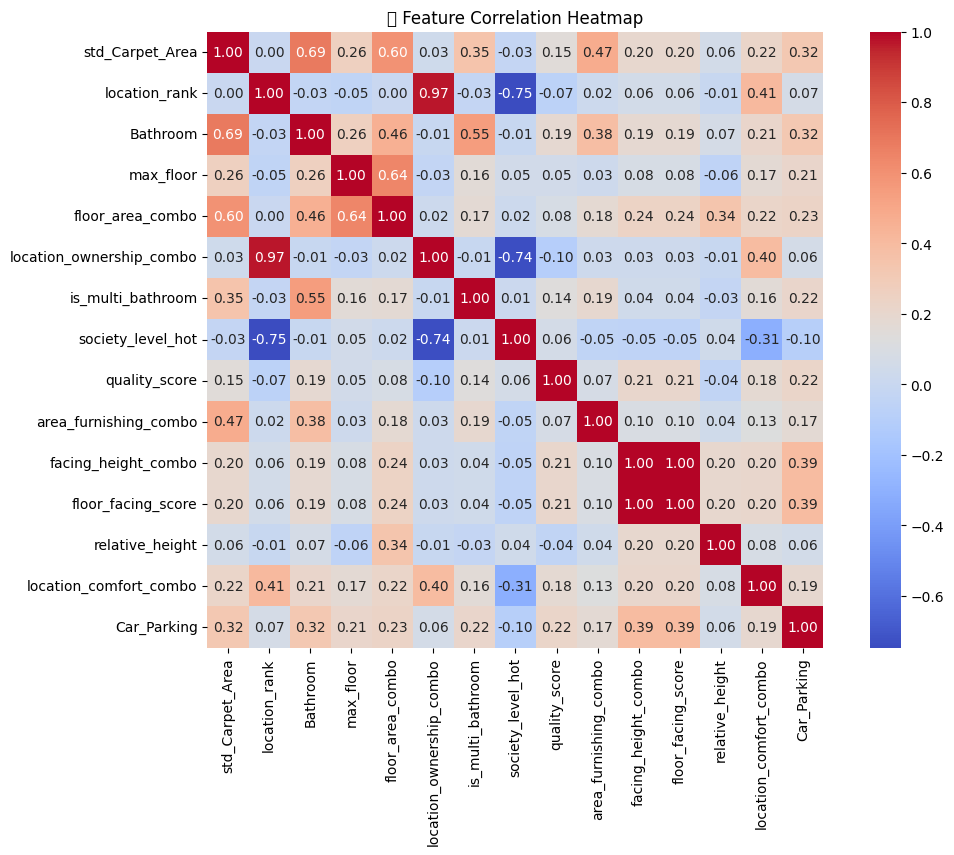

⚠️ 高度相关的特征对（|相关性| > 0.8)：
location_ownership_combo & location_rank → 相关系数: 0.968
floor_facing_score & facing_height_combo → 相关系数: 1.0
🔍 检测到 2 个高相关特征将被删除（阈值：0.8）：
['location_ownership_combo', 'floor_facing_score']
step3---VIF检验
🧪 方差膨胀因子(VIF)检测结果:
  feature        VIF
0   const  49.304772
step4---特征值重要性排序


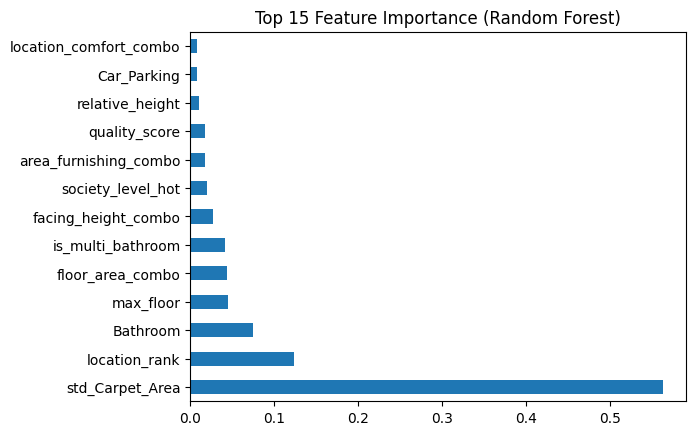

step5---特征值画图


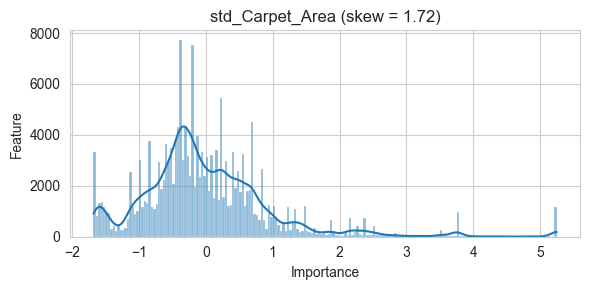

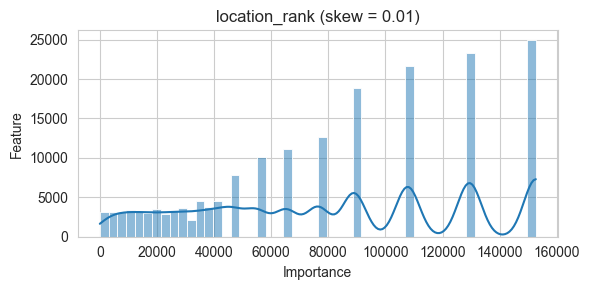

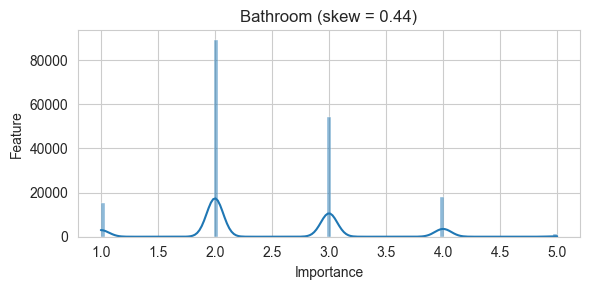

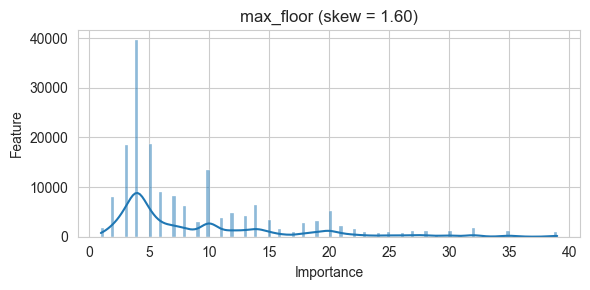

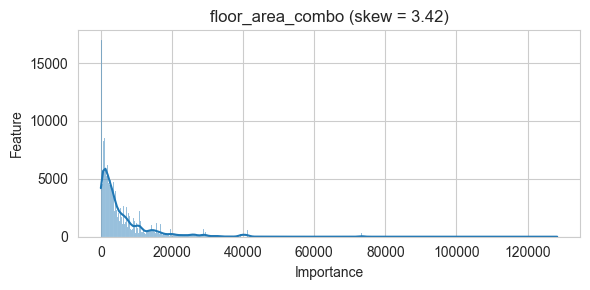

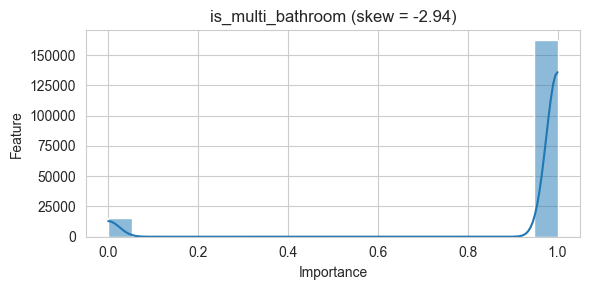

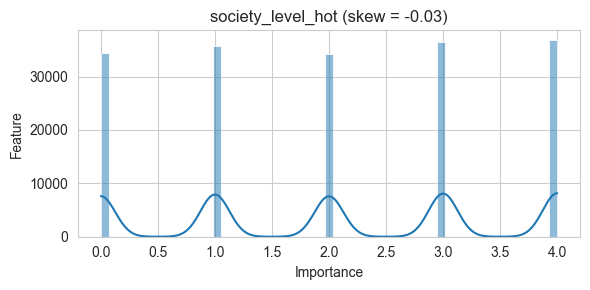

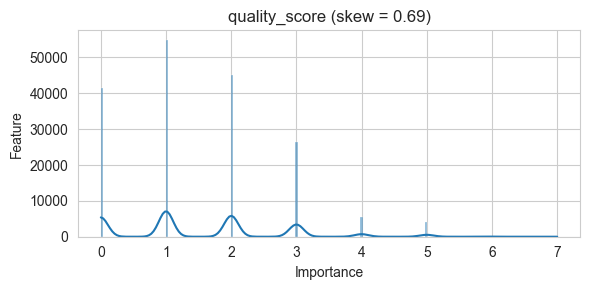

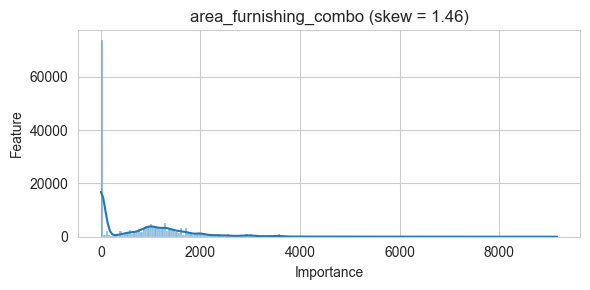

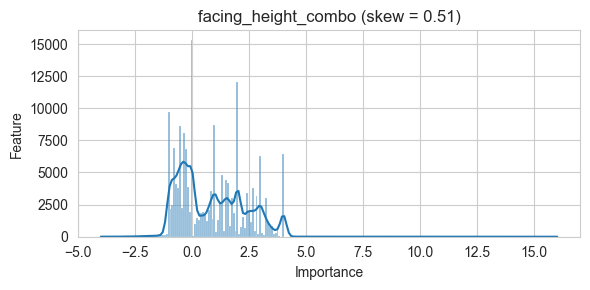

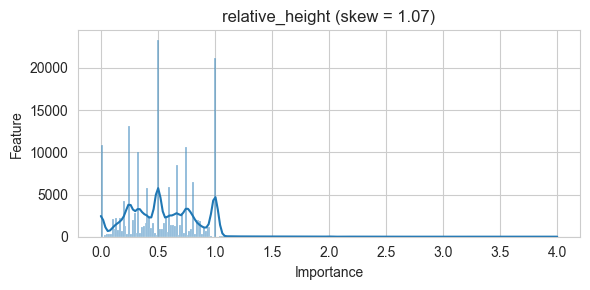

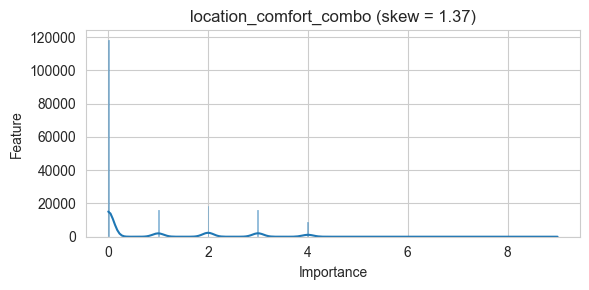

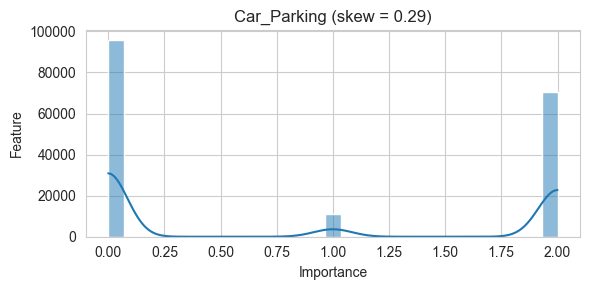

step6---特征值和目标变量的相关性


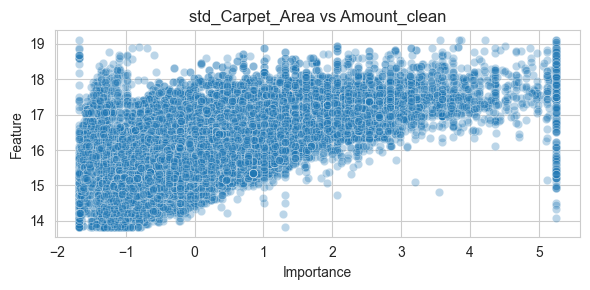

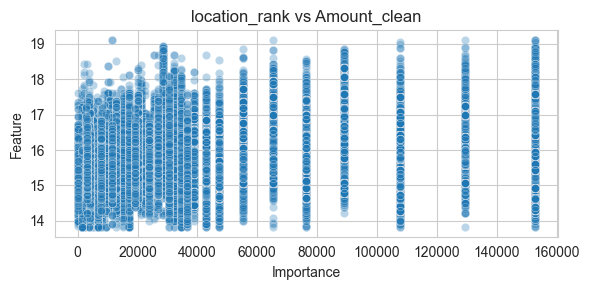

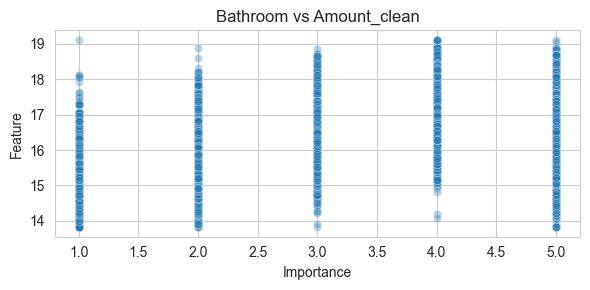

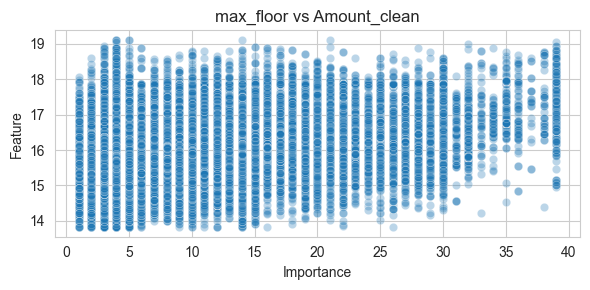

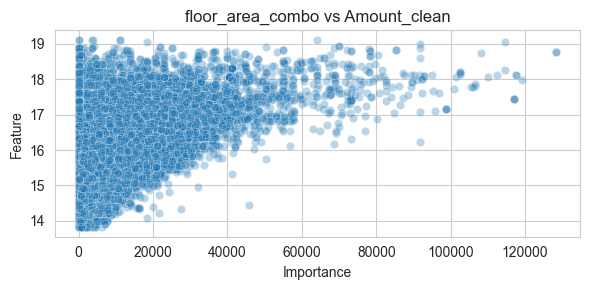

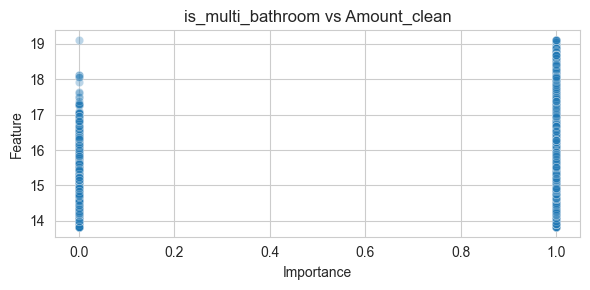

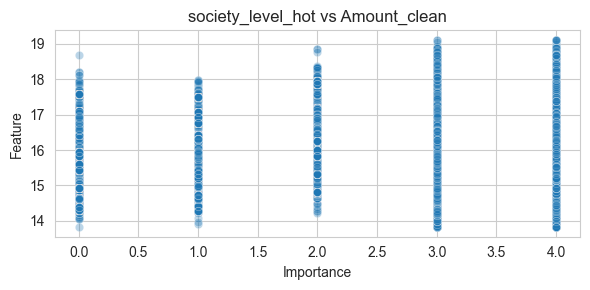

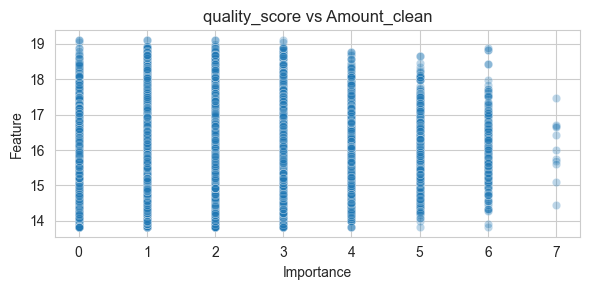

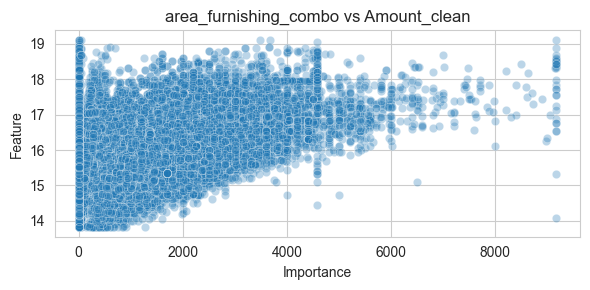

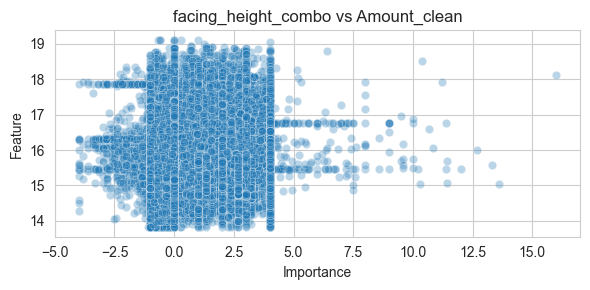

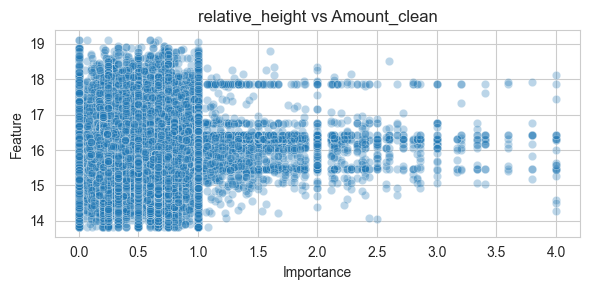

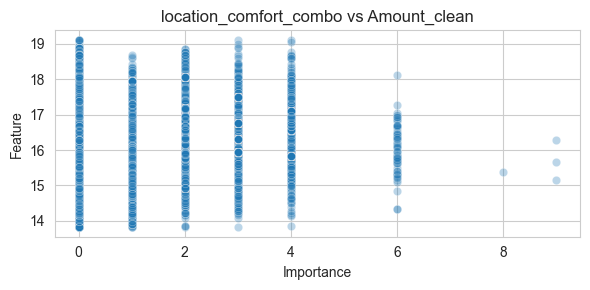

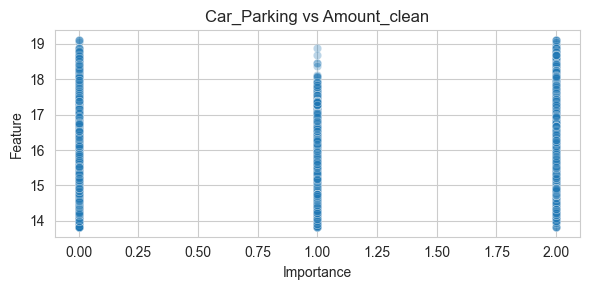

In [9]:
#特征向量相关性 + 自动剔除高相关
print("step2---特征向量相关性") 
advanced_feature = plot_feature_correlation(df_cleaned_features, features = top_features, threshold=0.8)
#VIF检验 + 自动剔除高度VIF
print("step3---VIF检验")
advanced_features_ultimate = check_multicollinearity(df_cleaned_features, features=advanced_feature,threshold=8)
#特征值重要性排序
print("step4---特征值重要性排序")
deep_analysis = FeatureDeepAnalysis(df_cleaned,features=advanced_features_ultimate,model_cls=RandomForestRegressor,target_col="Amount_clean")
deep_analysis.plot_feature_importance()
#特征值画图
print("step5---特征值画图")
deep_analysis.plot_feature_distribution()
#特征值和目标变量的相关性
print("step6---特征值和目标变量的相关性")
deep_analysis.plot_feature_vs_target()

Train Model 

In [10]:
after_trained_model, X_test, y_test = train_model(df_cleaned_features, df_cleaned, features_to_use = advanced_features_ultimate, model_cls = RandomForestRegressor) 

✅ 模型训练完成，保存到： models_saved/rf_model.pkl


Evaulate Model & Parameter optimization

In [11]:
#简单评估
evaluate_model(after_trained_model, X_test, y_test)



MAE: 0.10
RMSE: 0.21
R² Score: 0.9319


{'MAE': 0.09597240087339792,
 'RMSE': 0.21173463233816844,
 'R2': 0.9318674169704209}

In [12]:

#交叉检验稳定性

In [13]:
df_cross_evaulation = enhanced_cross_validate(model = RandomForestRegressor(),
                                               features = df_cleaned[advanced_features_ultimate], 
                                               target_col=df_cleaned["Amount_clean"].values, 
                                               return_df=True)
print("交叉检验结果如下:",df_cross_evaulation)

📊 5-折交叉验证结果:
🔹 MAE : 0.0950 ± 0.0006
🔹 MSE : 0.0439 ± 0.0009
🔹 R2  : 0.9338 ± 0.0014
交叉检验结果如下:     fit_time  score_time  test_MAE  test_MSE   test_R2
0  74.501927    0.727675 -0.095616 -0.044540  0.932310
1  75.442132    0.709952 -0.095609 -0.044786  0.932518
2  76.391955    0.803034 -0.094918 -0.043181  0.934751
3  76.821075    0.831986 -0.094312 -0.043975  0.933905
4  77.034380    0.774982 -0.094722 -0.042777  0.935388


grid_search (进行网格化调参)